<a href="https://colab.research.google.com/github/Sreelakshmim6/Personal-Projects/blob/main/Rocket_Lander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from random import seed
from random import random
#lm=0.8,a=0.5,lr=0.6
lm=0.8
alpha=0.5
lr=0.6


In [ ]:
#Initialize random weights between input layer to hidden layer
#Initialize random weights between output layer to hidden layer

In [ ]:
inpw=list()
for x in range(n_hidden):
    input_w=[random() for i in range(n_inputs)] #number of neurons in the input layer
    inpw.append(input_w)
opw=list()
for x in range(n_outputs):
    output_w=[random() for i in range(n_hidden)] #number of neurons in the hidden layer
    opw.append(output_w)


In [ ]:
print(inpw,"\n\n",opw,"\n")

[[0.04256124945266837, 0.7255740626767501], [0.08044468322531695, 0.49071034005914904], [0.35737165903557666, 0.05599433129938547], [0.43255456782705726, 0.13805792756009205]] 

 [[0.15912316141079885, 0.662143169924033, 0.4175098162530324, 0.7107939005058486], [0.21546438016120362, 0.6692569572792864, 0.9909681070957168, 0.5853521572472865]] 



In [ ]:
#to generate list of zeros
def zeros(n):
    list_z = [0] * n
    return list_z

In [ ]:
def dot(x,y):
    return sum(i*j for (i, j) in zip(x, y))

In [ ]:
# Activation Function
def sigmoid(activation,lm):
    return 1.0 / (1.0 + math.exp(-(lm*activation)))

In [ ]:
#Error function used
def RMSE(error):
    sum_e = 0.0
       
    for k in range(1):
        for j in range(1):
            for i in range(len(error)):
                pred_error =  (((error[i][j])**2)+((error[i][j+1])**2))/2
                #print(pred_error)
                sum_e += pred_error
                #print(sum_e)
    # now normalize
    mean_e = sum_e / float(len(error))
    return math.sqrt(mean_e)

In [ ]:
#Weight Updation
def wu(x,y):
    wu=[]
    for i in range(len(x)):
        d=[]
        for k in range(len(y[0])):
            f=x[i][k]+y[i][k]
            d.append(f)
        wu.append(d)
    return wu

In [ ]:
n_hidden=4

In [ ]:
n_inputs=2

In [ ]:
n_outputs=2

# Preprocessing

In [ ]:
import pandas as pd

dataC=pd.read_csv("C:\\Users\\Siri\\Desktop\\ANN\\ce889assignment-master\\ce889_dataCollection.csv",header=None)
dataC=dataC.drop_duplicates()
dataC.dropna(inplace=True)
#normalising
dataC=dataC.apply(lambda x: ( x - x.min()) / (x.max() - x.min()))
dataC.head()

,0,1,2,3
0,0.111756,0.443813,0.447712,0.581664
1,0.111756,0.443813,0.440348,0.585683
2,0.111722,0.443972,0.432984,0.581664
3,0.111722,0.444289,0.425620,0.585683
4,0.111688,0.444765,0.418256,0.581664


In [ ]:
t_size = int(0.7 * len(dataC)) #70-30 Split
mix = dataC.sample(frac=1)
t_set = mix[:t_size]  #Shuffling index and randomly selecting the data for split
val_set = mix[t_size:]
t_set.to_csv('C:\\Users\\Siri\\Desktop\\ANN\\ce889assignment-master\\TrainingSet.csv',index=False,header=None)
val_set.to_csv('C:\\Users\\Siri\\Desktop\\ANN\\ce889assignment-master\\ValidationSet.csv',index=False,header=None)

dataC.head(10)

,0,1,2,3
0,0.111756,0.443813,0.447712,0.581664
1,0.111756,0.443813,0.440348,0.585683
2,0.111722,0.443972,0.432984,0.581664
3,0.111722,0.444289,0.425620,0.585683
4,0.111688,0.444765,0.418256,0.581664
5,0.111688,0.445399,0.410892,0.585683
6,0.111654,0.446192,0.403529,0.581664
7,0.111654,0.447144,0.396165,0.585683
8,0.111620,0.448254,0.388801,0.581664
9,0.111620,0.449523,0.381437,0.585683


# feedforward propagation and back propagation

In [ ]:
epoch=77
listt=[]
listv=[]

for epoch_number in range(epoch):
    dw1=[]
    for i in range(n_outputs):
        output_dw=zeros(n_hidden)
        dw1.append(output_dw)
    dw0=[]
    for i in range(n_hidden):
        hidden_dw=zeros(n_inputs)
        dw0.append(hidden_dw)
    error_list=[]
    tFile = open("C:\\Users\\Siri\\Desktop\\ANN\\ce889assignment-master\\TrainingSet.csv", "r")
    for line in tFile.readlines():
        
        x= line.rstrip().split(",") # access values of line and divide them into a list 
        inputs=[x[0],x[1]]
        for i in range(0, len(inputs)): 
            inputs[i] = float(inputs[i])
            #print(inputs)
        outputs=[x[2],x[3]]
        for i in range(0, len(outputs)): 
            outputs[i] = float(outputs[i])
        #print(outputs)
        # FEED FORWARD PROCESS WITH EACH LINE
        
        #feedforward propagation from input layer to hidden layer
        
        feedforward_hidden_op = {}
        #inpw- randomly generated weights
        #%.10f - takes the first 10 decimal vals
        for x in range(len(inpw)):
            feedforward_hidden_op["h%s"% str(x+1)] = float("%.10f" % sigmoid(lm,dot(inputs,inpw[x])))
#feedforward propagation from hidden layer to output layer
        ff_op = {}
        for x in range(len(opw)):
            
            ff_op["o%s"% str(x+1)] = float("%.10f" % sigmoid(lm,dot(list(feedforward_hidden_op.values()),opw[x])))
            feedforward_output=list(ff_op.values())  #feedforward_output   is created as a list so that we can use it for error calculation     
        error = {}
        # change act to outputs
        for x in range(len(outputs)):
            error["error%s"% str(x+1)] = float("%.10f" % (outputs[x]-feedforward_output[x]))
            error_list1=list(error.values()) 
#computing the local gradient from output layer to hidden layer
    
        grad_op = {}
        for x in range(len(error)):
            grad_op["Grad_op%s"% str(x+1)] =float("%.10f" % (lm*list(ff_op.values())[x]*(1-list(ff_op.values())[x])*float(list(error.values())[x])))

#Backward weight updation from output layer to hidden layer
        #grad_op is grad of x_vel and y_vel
        #feedforward_hidden_op - h1,h1,h3
        
        wu1=[]
        for e in range(n_outputs):
            delta_output_weights=[]
            for k in range(1):
                for x in range(n_hidden):
                    delta_output_weights1= float("%.10f" % ((lr*float(list(grad_op.values())[e])*list(feedforward_hidden_op.values())[x])+(alpha*dw1[e][x])))
                    delta_output_weights.append(delta_output_weights1)
            wu1.append(delta_output_weights)

#weights rearrangement for backwardpropagation
        
        rearrange_opw={}
        #len(opw)-1 ---needs to iterate only once
        for k in range(len(opw)-1):
            for x in range(n_hidden):                           #n_hidden is the number of neurons in the hidden layer
                rearrange_opw["trasnpose_hidden_weight%s"% str(x+1)]=[(opw[k][x]),(opw[k+1][x])]

        #hidden local gradient 
        hg = {}
        for x in range(len(feedforward_hidden_op.keys())):
            hg["Grad_h%s"% str(x+1)] = float("%.10f" % (lm*list(feedforward_hidden_op.values())[x]*(1-list(feedforward_hidden_op.values())[x])*dot((list(grad_op.values())),(list(rearrange_opw.values())[x]))))       
            
        #backward weight updation from hidden layer to input layer
        h_updated_w=[]
        for e in range(n_hidden):
            d_hidden_w=[]
            for k in range(1):
                for x in range(len(inputs)):
                    d_hidden_w1= float("%.10f" % ((lr*float(list(hg.values())[e])*(inputs[x]))+(alpha*dw0[e][x])))
                    d_hidden_w.append(d_hidden_w1)
            h_updated_w.append(d_hidden_w)        
        dw0=h_updated_w 
        wu_input_layer=wu(inpw,h_updated_w)
        #wu_input_layer
        inpw=wu_input_layer
        dw1=wu1
        wu_output_layer=wu(opw,wu1)
        opw=wu_output_layer
        error_list.append(error_list1)
        
        
    tFile.close()
    error_list2=[]
    vFile = open("C:\\Users\\Siri\\Desktop\\ANN\\ce889assignment-master\\ValidationSet.csv", "r")
    for line in vFile.readlines():
        
        x= line.rstrip().split(",") # access values of line and divide them into a list 
        inputs=[x[0],x[1]]
        for i in range(0, len(inputs)): 
            inputs[i] = float(inputs[i])
            #print(inputs)
        outputs=[x[2],x[3]]
        for i in range(0, len(outputs)): 
            outputs[i] = float(outputs[i])
        #print(outputs)
        # FEED FORWARD PROCESS WITH EACH LINE
        #feedforward propagation from input layer to hidden layer
        feedforward_hidden_op = {}
        for x in range(len(inpw)):
            feedforward_hidden_op["h%s"% str(x+1)] = float("%.10f" % sigmoid(lm,dot(inputs,inpw[x])))
        #feedforward propagation from hidden layer to output layer
        ff_op = {}
        for x in range(len(opw)):
            ff_op["o%s"% str(x+1)] = float("%.10f" % sigmoid(lm,dot(list(feedforward_hidden_op.values()),opw[x])))
            feedforward_output=list(ff_op.values())  #feedforward_output   is created as a list so that we can use it for error calculation     
        error = {}
        for x in range(len(outputs)):
            error["error%s"% str(x+1)] = float("%.10f" % (outputs[x]-feedforward_output[x]))
            error_list3=list(error.values())
        error_list2.append(error_list3)
        
    vFile.close()
    
    rtrain=RMSE(error_list)
    rval=RMSE(error_list2)
    listt.append(rtrain)
    listv.append(rval)
    print("\nEpoch=",epoch_number,"\tRMSE:",RMSE(error_list),"\tValidation Error:",RMSE(error_list2))#"\tInput weights:",inpw,"\tOutput weights:",opw)
    
    
   


Epoch= 0 	RMSE: 0.11145941954905215 	Validation Error: 0.11103186346921876

Epoch= 1 	RMSE: 0.10924732836594402 	Validation Error: 0.11017032586675699

Epoch= 2 	RMSE: 0.10889755971179806 	Validation Error: 0.11001687896621333

Epoch= 3 	RMSE: 0.10870997241272339 	Validation Error: 0.10989835289004521

Epoch= 4 	RMSE: 0.10851711129874016 	Validation Error: 0.1097763266013689

Epoch= 5 	RMSE: 0.10830658197254503 	Validation Error: 0.1096350502080923

Epoch= 6 	RMSE: 0.108079835601914 	Validation Error: 0.1094760903435411

Epoch= 7 	RMSE: 0.10784919540398105 	Validation Error: 0.10931218275674645

Epoch= 8 	RMSE: 0.10763041605012034 	Validation Error: 0.10915737569614838

Epoch= 9 	RMSE: 0.10743500804796562 	Validation Error: 0.109020333605171

Epoch= 10 	RMSE: 0.10726711515620978 	Validation Error: 0.1089033073916384

Epoch= 11 	RMSE: 0.10712491236348014 	Validation Error: 0.10880434130026403

Epoch= 12 	RMSE: 0.10700358129787406 	Validation Error: 0.10871982385393647

Epoch= 13 	RMSE:

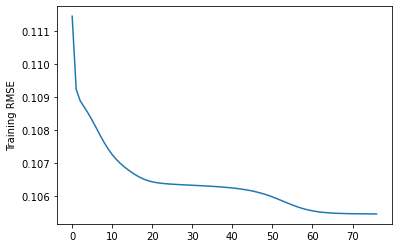

In [ ]:
import matplotlib.pyplot as plt
plt.plot(listt)
plt.ylabel('Training RMSE')
plt.show()
#no significant improvement in RMSE after epoch 75

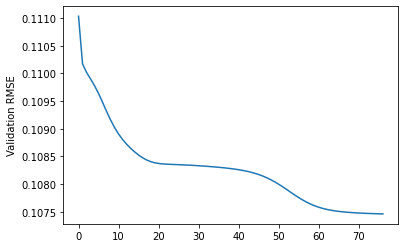

In [ ]:
plt.plot(listv)
plt.ylabel('Validation RMSE')
plt.show()

In [ ]:
#Epoch= 76
#Input weights: [[-5.27077343044729, -0.701618618343109], [-0.303053296403156, -3.3862605578928067], [-10.079618862252442, 0.49599262754927115], [-2.663844415638876, -4.912691659531325]] 	
#Output weights: [[-2.8915910743825552, -1.149065558158696, 0.9779885147119902, 4.742918557199674], [-4.6371634408322535, 4.970945772312703, 4.353267584573851, -7.250034917901074]]